# TensorFlow/ Keras
- TensorFlow 와 Keras 는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리 이다. 
- Keras 는 사용자가 TensorFlow 를 좆ㅁ 더 쉽고 편하게 사용할 수 있게 해주는 high level API 를 제공한다. 
- TensorFlow 2.x 에서는 Keras 를 딥러닝의 공식 API 로 채택, Keras 는 TensorFlow 내의 하나의 framework 으로 개발되고 있다

# TensorFlow / Keras Basic

### TensorFlow / Keras import

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
print(tf.__version__ )
print(keras.__version__)

2.7.0
2.7.0


### TensorFlow / Keras 맛보기

In [40]:
import numpy as np
import matplotlib.pyplot as plt 

# MNIST Dataset Download 
mnist = keras.datasets.mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [41]:
# Model 생성, compile
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)), # flatten 시켜준다 # input
                                    tf.keras.layers.Dense(units = 128 , activation = "relu"), # Dense Layer 
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = "softmax") 
])

model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"]) 

In [42]:
# Training / Evaluation

model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test) # [0.06833620369434357, 0.982200026512146] : loss , accuracy

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2944 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1420 - accuracy: 0.9577
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1058 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0727 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0581 - accuracy: 0.9808
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - accuracy: 0.9839
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.07

[0.0746191218495369, 0.9787999987602234]

- 데이터 탐색

In [43]:
idx = np.random.randint(len(x_train)) # index
image = x_train[idx] 

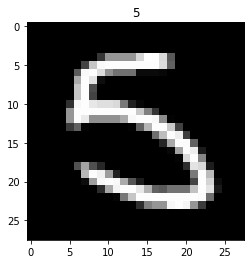

In [44]:
plt.imshow(image, cmap = "gray") # imshow = image show , cmap = color map
plt.title(y_train[idx])
plt.show()

- 내가 쓴 손글씨로 Test 해보기. 
- Colab 을 쓰는 경우에는 아래 cell 을 실행하면 파일을 업로드할 수 있다. 
- 그림판과 같은 도구를 이용하여 손으로 숫자를 쓴 다음 파일로 저장하고 업로드 한다. 
- 이 때 파일명은 image.png 로 한다.

In [45]:
# 파일을 업로드할 수 있는 소스 코드

import os 
from PIL import Image 
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys() :
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn , length = len(uploaded[fn])))

Saving image.png to image (1).png
User uploaded file "image.png" with length 437 bytes


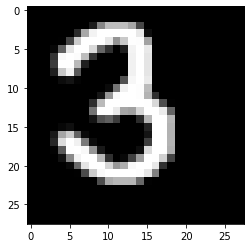

In [50]:
# image file 의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, "image.png") # 현재 디렉토리 + image 파일 이름
# image file 읽기
cur_img = Image.open(img_path)
# 28 X 28 사이즈로 resize
cur_img = cur_img.resize((28, 28))
# array 로 변환
image = np.asarray(cur_img)

# color image 일 경우 RGB 평균값으로 gray scale 로 변경 
# 예외 처리 
# try 블록 수행 중 오류가 발생하면 except 블록이 수행된다. 하지만 try 블록에서 오류가 발생하지 않는다면 except 블록은 수행되지 않는다.

try :
    image = np.mean(image, axis = 2)
except : 
    pass
# upload 한 image 는 흰 배경에서 검은 글씨로 되어 있으므로, MNIST data 와 같이 검은 배경에 흰 글씨로 변경 
image = np.abs(255- image)
# MNIST 와 동일하게 data preprocessing (255 로 나눠줌) => scaling
image = image.astype(np.float32) / 255
# 화면에 출력하여 확인 
plt.imshow(image, cmap = "gray")
plt.show()


In [51]:
# shape 을 변경하여 학습된 model 에 넣고 결과 확인
import numpy as np

image = np.reshape(image , (1, 28, 28)) # 1 은 batch size
pred = model.predict(image)
print(pred)

print("Model 이 예측한 값은 {} 입니다".format(np.argmax(pred), -1))
print("Model 이 예측한 정확도 : " , pred[np.where(pred >= np.max(pred))]) # 예측 정확도

[[1.08203696e-22 9.90454220e-17 1.61743883e-05 9.99983788e-01
  1.20252364e-19 1.80287278e-11 1.02851955e-16 2.61754093e-19
  2.08890382e-16 1.62055964e-23]]
Model 이 예측한 값은 3 입니다
Model 이 예측한 정확도 :  [0.9999838]


### Tensor

Tensor 는 multi-dimensional array 를 나타내는 말로, TensorFlow 의 기본 data type 입니다. 

In [52]:
# Hello World 
hello = tf.constant([3,3], dtype = tf.float32) 
# data, shape, dtype 모두 나옴
print(hello)
print(hello.numpy())

tf.Tensor([3. 3.], shape=(2,), dtype=float32)
[3. 3.]


In [53]:
# Hello World 
hello = tf.constant("hello world") 
# data, shape, dtype 모두 나옴
print(hello)
print(hello.numpy())

tf.Tensor(b'hello world', shape=(), dtype=string)
b'hello world'


In [55]:
# 상수형 tensor 는 아래와 같이 만들 수 있다
# 출력해보면 tensor 의 값과 함께, shape과 내부의 data type 을 함께 볼 수 있다. 
import tensorflow as tf 

x = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]] , dtype = tf.float32)
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [56]:
# 아래와 같이 numpy ndarray 나 python 의 tensor 로 바꿀 수 있다. 
x_np = np.array([[1, 2], 
                 [3, 4]])
x_list = [[1, 2],
          [3, 4]]

print(type(x_np))
print(type(x_list))

x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))


<class 'numpy.ndarray'>
<class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [57]:
# 반대로 tensor 를 다음과 같이 ndarray 로 바꿀 수 있다. 
x = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]] , dtype = tf.float32)

x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [60]:
a = tf.ones(shape = (2, 3))  # shape 에 맞춰 1로 채운다
b = tf.zeros(shape = (2, 3)) # shape 에 맞춰 0으로 채운다
c = tf.fill(dims = (2, 3), value = 2)

print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2 2]
 [2 2 2]], shape=(2, 3), dtype=int32)


In [63]:
d = tf.ones_like(c)  # c 와 같은 shape 으로 0으로 채워진 텐서를 만들어 준다 , dtype 도 가져온다. 
e = tf.zeros_like(c)

print(d)
print(e)

tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)


In [64]:
# identity matrix => 대각행렬 만 1 
f = tf.eye(3) 
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [65]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [69]:
h = tf.random.uniform(shape = (2, 2), minval = 0, maxval = 10) # 0 ~ 10 사이의 값 중 같은 확률으로 난수를 shape 에 맞춰 sampling 한다. 
i = tf.random.normal(shape = (2, 2), mean = 0 , stddev = 1) # 평균은 0이고 표준편차는 1 인 정규분포에서 값을 랜덤하게 뽑는다. # 즉 0에 가까운 값이 많이 뽑히게 된다. 

# uniform = np.rand
# normal = np.randn

print(h)
print(i)

tf.Tensor(
[[6.8653584 9.973476 ]
 [3.0621219 3.8780046]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.7981629  -0.8572235 ]
 [-0.7187942  -0.58928514]], shape=(2, 2), dtype=float32)


### Tensor 의 속성

In [70]:
tensor = tf.random.normal(shape = (3, 4))

print(f"Shape of tensor : {tensor.shape}")
print(f"Datatype of tensor : {tensor.dtype}")

Shape of tensor : (3, 4)
Datatype of tensor : <dtype: 'float32'>


In [71]:
# 속성 변경 
tensor = tf.reshape(tensor, shape = (4, 3)) # tf.reshape : 차원 변경
tensor = tf.cast(tensor, tf.int32) # tf.cast : dtyep 변경

print(f"Shape of tensor : {tensor.shape}")
print(f"Datatype of tensor : {tensor.dtype}")

Shape of tensor : (4, 3)
Datatype of tensor : <dtype: 'int32'>


### Variable
- Variable 은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서이다. 딥러닝에서는 학습해야하는 가중치 (weight, bias) 들을 variable 로 생성한다. 

In [73]:
# tensor 의 값 변경 - 변경 불가능 
tensor = tf.ones(shape = (3, 4))
print(tensor)

# error 발생 
# tensor 는 값이 한 번 생성되면 변경 불가능
# tuple 의 속성을 떠올릴 수 있음
tensor[0, 0] = 2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: ignored

In [74]:
# variable 만들기, 값 변경 
variable = tf.Variable(tensor)
print(variable)

variable[0, 0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [75]:
# 초기값을 사용해서 Variable 을 생성할 수 있다. 
initial_value = tf.random.normal(shape = (2, 2))
# tf.variable 으로 감싸준다. 
weight = tf.Variable(initial_value)

print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.205208  , -0.5265694 ],
       [ 0.06756867,  0.47323924]], dtype=float32)>


In [76]:
# 아래와 같이 variable 을 초기화해주는 initialzer 들을 사용할 수도 있다.
weight = tf.Variable(tf.random_normal_initializer(stddev = 1.)(shape = (2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.643511  ,  0.01377756],
       [-0.95566446,  1.3273606 ]], dtype=float32)>


In [77]:
# variable 은 .assign(value) , .assign_add(increment) 또는 .assign_sub(decrement)
# 와 같은 메서드를 사용해서 Variable 값을 갱신한다. 

new_value = tf.random.normal(shape = (2, 2))
print(new_value)
weight.assign(new_value) 
print(weight)

tf.Tensor(
[[ 0.8172702   2.1661544 ]
 [ 0.15148082 -2.173403  ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.8172702 ,  2.1661544 ],
       [ 0.15148082, -2.173403  ]], dtype=float32)>


In [80]:
# 덧셈 뺄셈 (Variable 객체)

added_value = tf.ones(shape = (2, 2))

# weight - added_value
weight.assign_sub(added_value)
print(weight)

# weight + added_value 
weight.assign_add(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.1827297 ,  0.16615438],
       [-1.8485192 , -4.173403  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.18272972,  1.1661544 ],
       [-0.8485192 , -3.1734028 ]], dtype=float32)>


### Indexing 과 Slicing 

In [82]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))

print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [84]:
# indexing  => 차원 감소
print(a[1])     
print(a[0, 0])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [85]:
# slicing 
print(a[1 : -1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose

In [86]:
# 사진으로 친다면 2 X 2 크기의 사진이 4장 있는 것
a = tf.range(16)
a = tf.reshape(a , (2, 2, -1))

print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [89]:
# 원래 tensor 의 차원의 2번째를 맨 앞으로 0번째를 두번째로, 1번째를 2번째로 변경
# 위의 tensor 형태로 보면 조금 헷갈리는 감이 있기 때문에
# 마지막 차원을 맨 앞으로 가져온다 
# 그렇게 되면 2 X 2 크기의 이미지가 4장이 있다라고 생각하기 편한 형태가 된다. 

b = tf.transpose(a , (2, 0, 1))
print(b.shape)
print(b)

(4, 2, 2)
tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


# Tensor 연산
- element wise 연산

In [90]:
x = tf.random.normal(shape = (2, 2))
y = tf.random.normal(shape = (2, 2))

print(x)
print(y)

tf.Tensor(
[[-0.68718433 -0.20228204]
 [-0.86188185  1.5322412 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.45775595  0.616713  ]
 [-0.6133134   0.959791  ]], shape=(2, 2), dtype=float32)


In [91]:
print(x+y)
print(x-y)
print(x * y)
print(x / y)
print(x @ y) # matmul
print(" = " * 50 )
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[-1.1449403   0.41443095]
 [-1.4751952   2.4920323 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.22942838 -0.818995  ]
 [-0.24856848  0.5724502 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.3145627  -0.12474996]
 [ 0.5286037   1.4706314 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.5012023 -0.3280003]
 [ 1.4052879  1.5964322]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.43862498 -0.617944  ]
 [-0.5452125   0.93909764]], shape=(2, 2), dtype=float32)
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
tf.Tensor(
[[-1.1449403   0.41443095]
 [-1.4751952   2.4920323 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.22942838 -0.818995  ]
 [-0.24856848  0.5724502 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.3145627  -0.12474996]
 [ 0.5286037   1.4706314 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.5012023 -0.3280003]
 [ 1.4052879  1.5964322]], shape=(2, 2), dtype=fl

In [93]:
z = tf.range(1, 11)
z = tf.reshape(z , shape = (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [98]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [96]:
sum1 = tf.reduce_sum(z, axis = 0) # 행 방향으로 더한다. why reduce? 차원이 감소하기 때문
sum2 = tf.reduce_sum(z, axis = 1)
sum3 = tf.reduce_sum(z, axis = -1) # 마지막 차원 방향으로 더한다.

print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


# Dataset